In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ApiClient
from src.utils import *
from src.const import *
from src.plots import *

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
client = ApiClient()

In [79]:
client.create(
    [
        client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="What's in this image?",
            img="https://cdn.midjourney.com/ca13f713-b289-45ee-92fe-b1276a1dc833/0_3.webp",
        ),
    ],
    format=JSON_MODE,
)

'{\n  "description": "The image features a female animated character with vibrant red hair and striking blue eyes. She is wearing a black bikini and is posed with her arms raised, hands behind her head, against a soft blue background.",\n  "style": "The artwork is rendered in a detailed digital painting style, characterized by smooth shading, detailed hair texturing, and a vivid color palette."\n}'

In [80]:
plt.plot(np.sin(np.array(range(300)) * 0.1))

client.create(
    [
        client.make_msg(
            "You are image descripto. Respond with json of this format: {'description': what you see, 'style': stylistics of the image}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="What's in this image?",
            img=plt,
        ),
    ],
    format=JSON_MODE,
)

'{"description": "The image displays a sine wave graph with five complete cycles stretching across a grid. The x-axis ranges from 0 to just over 300, and the y-axis ranges from -1.00 to 1.00. The wave oscillates smoothly between these y-values, demonstrating typical wave behavior.", "style": "Simplistic and educational, primarily used for illustrating mathematical concepts such as waves and oscillations."}'

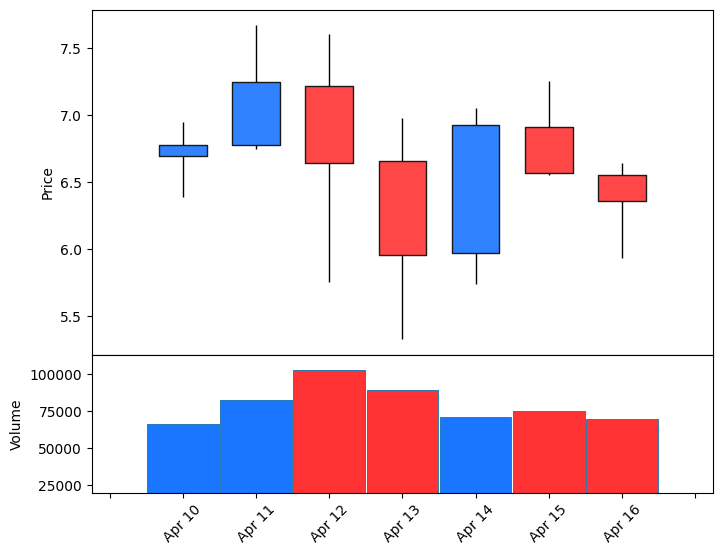

In [81]:
from src.signal_providers.exmo_signal_provider import ExmoProvider

provider = ExmoProvider()
candles = provider.get_history("TON", start_date=1712707200, end_date=1713229200, resolution="D")

make_candlebars(candles)

In [87]:
buf = make_candlebars(candles, useBuf=True)

client.create(
    [
        client.make_msg(
            "You are image descriptor. Respond with json of this format: {'description': what you see, 'trend_analysys': rough prediction of future development of coin}",
            role=ROLE_SYSTEM,
        ),
        client.make_msg(
            text="What's in this image?",
            img=buf,
        ),
    ],
    format=JSON_MODE,
)

'{\n  "description": "The image displays a combination of a candlestick chart and a bar chart plotted on dual y-axes, representing price and volume over several days in April. The candlestick chart shows prices from April 10 to April 16 with daily price variations: open, close, high, and low prices, where blue boxes indicate days where the closing price was higher than the opening price, and red boxes indicate the opposite. Below the candlestick chart, there is a bar graph representing trading volume on each day with corresponding colors (blue and red) indicating the price increase or decrease for that day."\n}'